# Week 5_Day 3 : Optimizers + The Training Loop

## Creating an Optimizer

In [1]:
# existing model 
import torch
import torch.nn as nn

class LogisticRegressionModel(nn.Module):
    def __init__(self, n_features, n_classes):
        super().__init__()
        self.linear = nn.Linear(n_features, n_classes)
        
    def forward(self, x):
        return self.linear(x)

In [2]:
model = LogisticRegressionModel(n_features=2, n_classes=2)

# creating an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Training Loop Anatomy

### THEORY — The 6 Essential Steps

A real training loop always follows this skeleton:

**Step 1 — Forward pass**  
The model makes predictions.

**Step 2 — Compute loss**  
How wrong are the predictions?

**Step 3 — Zero gradients**  
PyTorch accumulates gradients, so we must clear old ones.

**Step 4 — Backward pass**  
Compute gradients using autograd.

**Step 5 — Optimizer step**  
Update the model’s weights.

**Step 6 — Repeat**  
Run this process for many epochs.

### Create a Dataset

In [3]:
X = torch.tensor([[50.0, 600.0],
                  [30.0, 500.0],
                  [80.0, 720.0],
                  [25.0, 450.0],
                  [60.0, 650.0],
                  [20.0, 400.0]])

y = torch.tensor([1, 0, 1, 0, 1, 0])  # class labels

### Model + Loss + Optimizer

In [4]:
model = LogisticRegressionModel(n_features=2, n_classes=2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Training Loop

In [5]:
epochs = 200
loss_history = []

for epoch in range(epochs):
    # 1) Forward pass
    logits = model(X)
    
    # 2) Loss
    loss = criterion(logits, y)
    
    # 3) Zero gradients
    optimizer.zero_grad()
    
    # 4) Backward pass
    loss.backward()
    
    # 5) Update weights
    optimizer.step()
    
    loss_history.append(loss.item())
    
    # Print occasionally
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 20/200, Loss: 131.7756
Epoch 40/200, Loss: 59.2126
Epoch 60/200, Loss: 0.0015
Epoch 80/200, Loss: 0.0015
Epoch 100/200, Loss: 0.0015
Epoch 120/200, Loss: 0.0015
Epoch 140/200, Loss: 0.0015
Epoch 160/200, Loss: 0.0015
Epoch 180/200, Loss: 0.0015
Epoch 200/200, Loss: 0.0015


### Accuracy

In [6]:
with torch.no_grad():
    logits = model(X)
    predictions = torch.argmax(logits, dim=1)
    accuracy = (predictions == y).float().mean()

print("Predictions:", predictions)
print("True labels :", y)
print("Accuracy    :", accuracy.item())

Predictions: tensor([1, 0, 1, 0, 1, 0])
True labels : tensor([1, 0, 1, 0, 1, 0])
Accuracy    : 1.0


### Plotting the Loss Curve

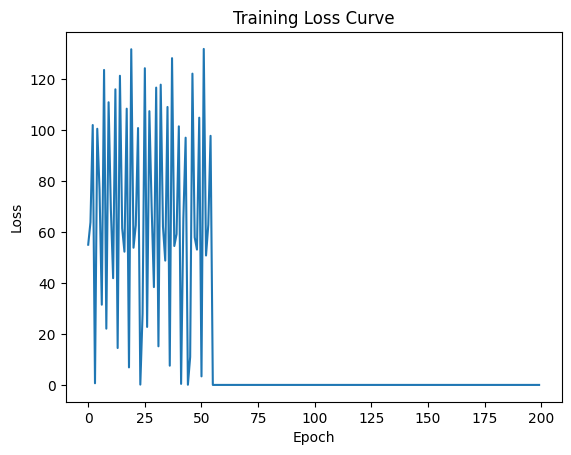

In [7]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()